# Vector Embeddings of Log Lines with BERT
This notebook demonstrates the embedding of log line samples into a vector space based on [Sentence-Bert](https://www.sbert.net), an extension to the `BERT` model.

The log line samples orignate from the BGL sample...

These models will be considered in the comparison:
- Model x



In [1]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt

# custom
from src.embedder import get_embedding
from src.data import pre_process, get_labels, delete_bgl_labels

In [2]:
# set sentence transformer model type
model_name = 'all-mpnet-base-v2'

# set log file and format
log_file   = 'BGL_2k.log'  
log_format = '<Label> <Id> <Date> <Code1> <Time> <Code2> <Component1> <Component2> <Level> <Content>'  # BGL log format

In [3]:
# loads and parses logs with drain logparser
pre_process(log_format, log_file)
labels = get_labels(log_file)
delete_bgl_labels(log_file)

Parsing file: ./logs/BGL_2k.log
Total size after encoding is 2000 2000
Parsing done. [Time taken: 0:00:01.135755]


In [8]:
### code to compute embedding
embedding_processed = get_embedding(log_file, model_name, processed_flag=True, label_flag=True)
embedding_processed_nolabel = get_embedding(log_file, model_name, processed_flag=True, label_flag=False)
embedding_unprocessed = get_embedding(log_file, model_name, processed_flag=False, label_flag=True)
embedding_unprocessed_nolabel = get_embedding(log_file, model_name, processed_flag=False, label_flag=False)


## Plotting Section

### Plot functions

In [15]:
def plot_sim_matrix(embeddings, idc: list, labels: list):
    """ plots cosine similarity matrix 
    Params:
        embeddings:
        idc (list[int]): list of indices of log lines that should be included in plot
    """
    plot_logs = []
    cos_scores = util.cos_sim(embeddings, embeddings)

    # convert to numpy to leverage np.ix_function
    # NOTE: conversion leads to loss of accuracy, but for plotting it is ok
    cos_scores_np = cos_scores.numpy()
    sim_matrix = cos_scores_np[np.ix_(idc, idc)]

    # plot
    fig, ax = plt.subplots(figsize=(6,6))
    cax = ax.matshow(sim_matrix, interpolation='nearest')
    plt.title("Cosine Similarity Matrix for Log Lines")
    plt.xticks(range(len(idc)), labels[idc[0]:idc[-1]+1], rotation=90)
    plt.yticks(range(len(idc)), labels[idc[0]:idc[-1]+1])
    fig.colorbar(cax)
    plt.show()

# TODO: plot table
# TODO: plot 2 dim embedding

### Plots

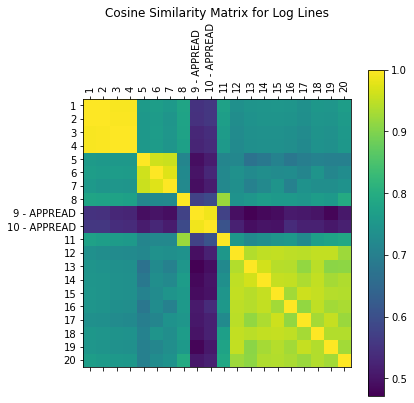

In [12]:
### code to plot
idc = range(0, 20)
plot_sim_matrix(embedding_processed, idc, labels)

In [ ]:
### code to plot
idc = range(20)
plot_sim_matrix(embedding_processed, idc)

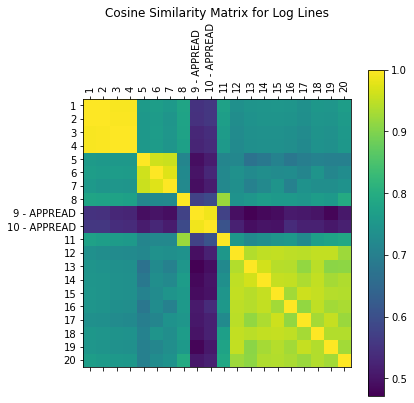

In [11]:
### code to plot
idc = range(20)
plot_sim_matrix(embedding_processed_nolabel, idc, labels)

In [27]:
# TODO: 
# 1. Plot Embedding in 2-dim space
# 2. Plot table with avg, max, min cos distance

# 3. use different transformer model 
# 4. use different log lines (hgdl)